In [18]:
#1) Prepare a classification model using Naive Bayes for salary data

#Data Description:

#age -- age of a person
#workclass	-- A work class is a grouping of work
#education	-- Education of an individuals
#maritalstatus -- Marital status of an individulas
#occupation	 -- occupation of an individuals
#relationship --
#race --  Race of an Individual
#sex --  Gender of an Individual
#capitalgain --  profit received from the sale of an investment
#capitalloss	-- A decrease in the value of a capital asset
#hoursperweek -- number of hours work per week
#native -- Native of an individual
#Salary -- salary of an individual

In [14]:
import numpy as np
import pandas as pd

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [21]:
train = pd.read_csv('SalaryData_Test.csv')

In [23]:
test = pd.read_csv('SalaryData_Train.csv')

In [24]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [25]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [28]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [29]:
train['maritalstatus'].value_counts()

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

In [31]:
test[test.duplicated()].shape

(3258, 14)

In [32]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [33]:
Train =train.drop_duplicates()

In [34]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [35]:
Train.isnull().sum().sum()
## there is no nan values in the Train Data set

0

In [36]:
test[test.duplicated()].shape

(3258, 14)

In [37]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [38]:
Test=test.drop_duplicates()

In [39]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [40]:
Test.isnull().sum().sum()
## there is no nan values in the Train Data set

0

In [41]:
Train['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [42]:
Test['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [43]:
train['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [44]:
pd.crosstab(Train['occupation'],Train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,1451,252
Armed-Forces,2,3
Craft-repair,1338,391
Exec-managerial,1022,875
Farming-fishing,427,57
Handlers-cleaners,597,51
Machine-op-inspct,801,112
Other-service,1449,64
Priv-house-serv,87,2


In [45]:
pd.crosstab(Train['workclass'],Train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,278,182
Local-gov,721,296
Private,7932,2206
Self-emp-inc,259,306
Self-emp-not-inc,937,342
State-gov,488,176
Without-pay,5,2


In [46]:
pd.crosstab(Train['workclass'],Train['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,169,5,29,86,1,13,5,20,0,70,19,3,28,12
Local-gov,135,0,65,115,14,18,11,104,0,343,142,9,20,41
Private,1244,0,1283,1201,211,596,863,1206,89,997,106,1373,400,569
Self-emp-inc,16,0,59,210,30,4,4,15,0,84,0,126,6,11
Self-emp-not-inc,20,0,255,189,217,6,23,101,0,197,1,195,16,59
State-gov,119,0,38,95,9,10,6,66,0,208,58,8,29,18
Without-pay,0,0,0,1,2,1,1,1,0,0,0,1,0,0


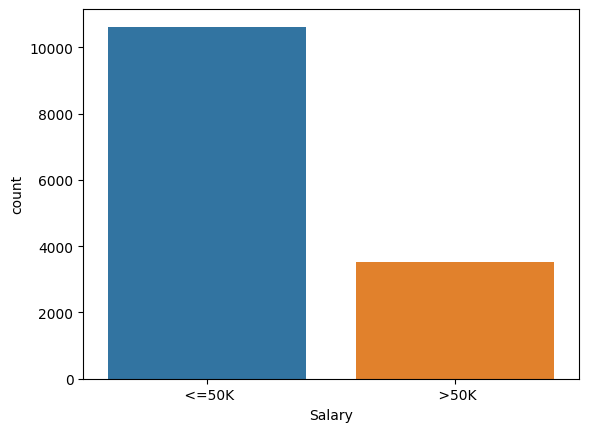

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [47]:
sns.countplot(x='Salary',data= Train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Train['Salary'].value_counts()

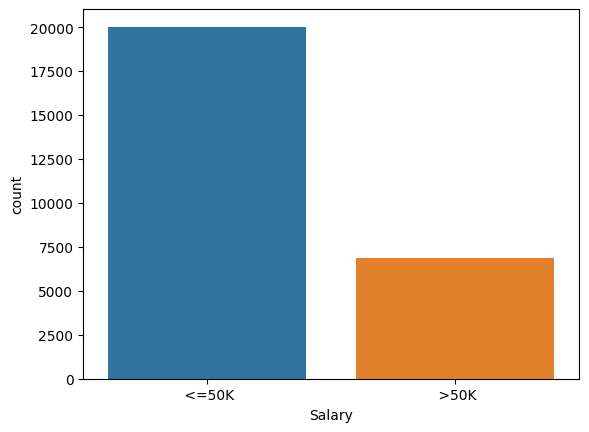

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [48]:
sns.countplot(x='Salary',data= Test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
Test['Salary'].value_counts()

<Axes: ylabel='occupation'>

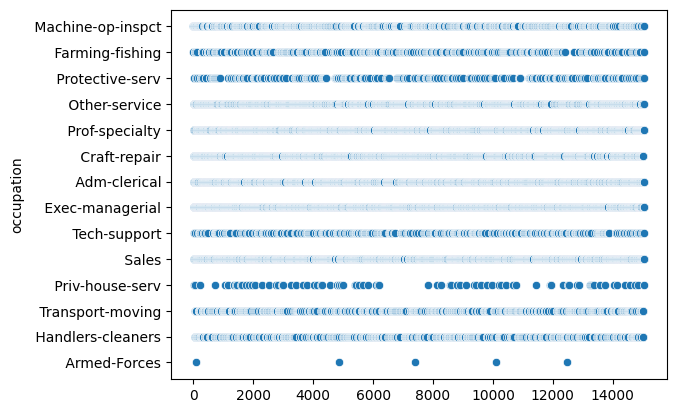

In [51]:
sns.scatterplot(Train['occupation'])

<Axes: ylabel='workclass'>

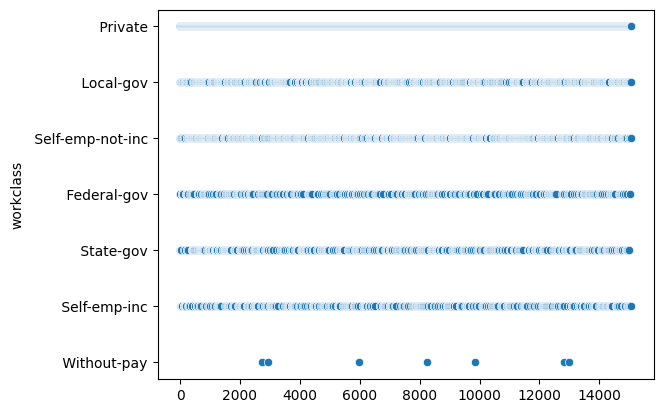

In [52]:
sns.scatterplot(Train['workclass'])

<Axes: >

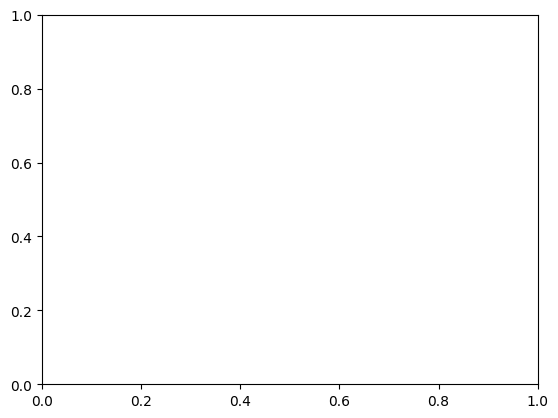

In [57]:
sns.scatterplot(Hue=Train['Salary'])

<Axes: xlabel='education'>

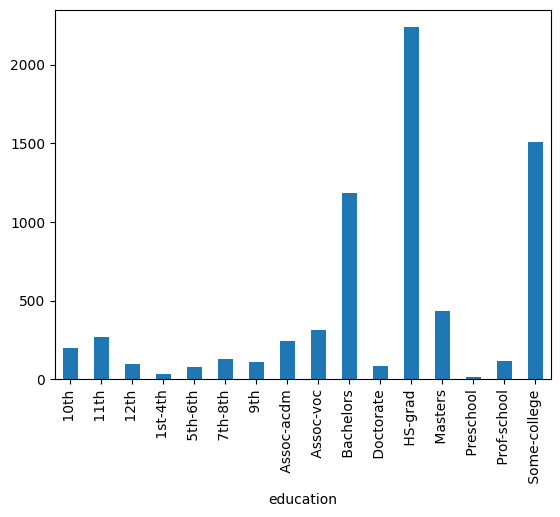

In [58]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

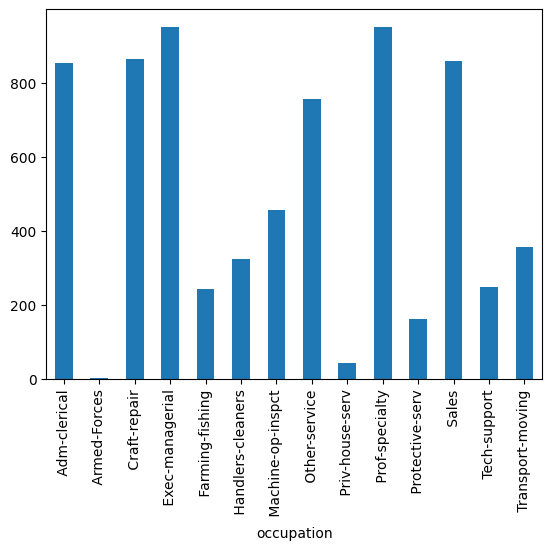

In [59]:
pd.crosstab(Train['Salary'],Train['occupation']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

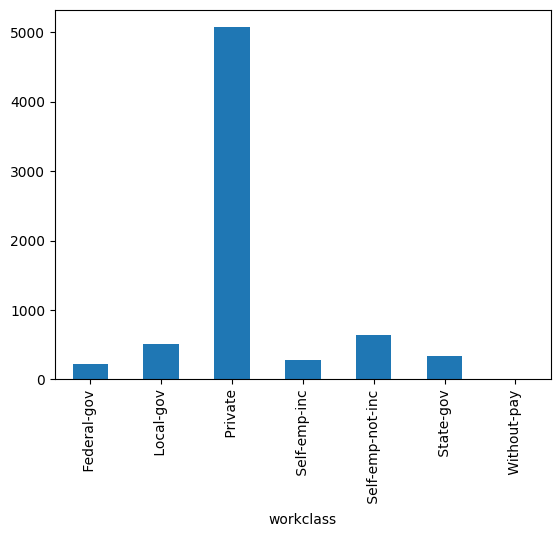

In [60]:
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

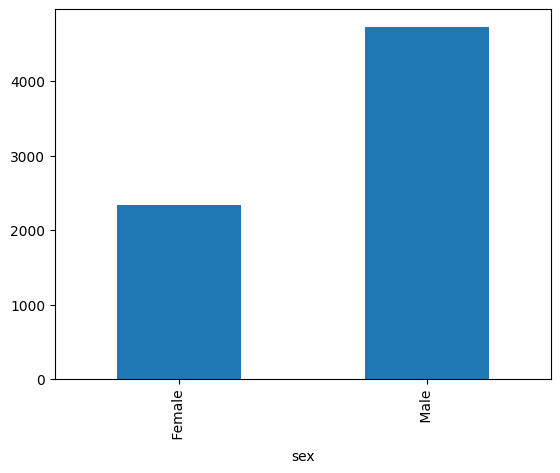

In [61]:
pd.crosstab(Train['Salary'],Train['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

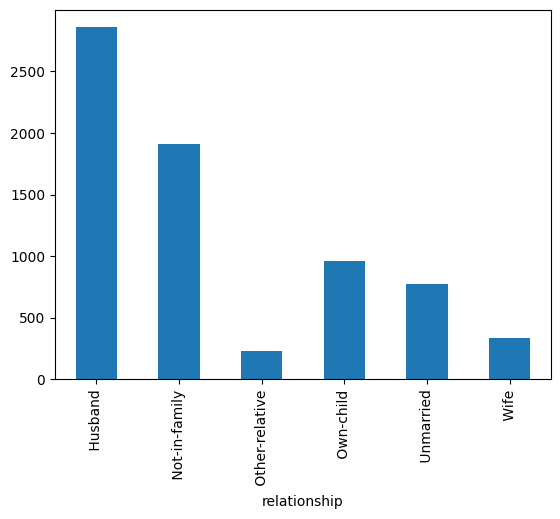

In [62]:
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar')

In [63]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [64]:
##Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

<ipython-input-64-b761bae27bef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train[i]= number.fit_transform(Train[i])
<ipython-input-64-b761bae27bef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test[i]=number.fit_transform(Test[i])
<ipython-input-64-b761bae27bef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [65]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [66]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [67]:
##Capturing the column names which can help in futher process
colnames = Train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [68]:
len(colnames)

14

In [69]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [70]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [71]:
Test['maritalstatus'].value_counts()

2    12371
4     8387
0     4009
5      928
6      817
3      370
1       21
Name: maritalstatus, dtype: int64

In [72]:
# storing the values in x_train,y_train,x_test & y_test for spliting the data in train and test for analysis
x_train = Train[colnames[0:13]].values
y_train = Train[colnames[13]].values
x_test = Test[colnames[0:13]].values
y_test = Test[colnames[13]].values

In [73]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [74]:
x_train

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]])

In [75]:
x_test

array([[39,  5,  9, ...,  0, 40, 37],
       [50,  4,  9, ...,  0, 13, 37],
       [38,  2, 11, ...,  0, 40, 37],
       ...,
       [27,  2,  7, ...,  0, 38, 37],
       [58,  2, 11, ...,  0, 40, 37],
       [52,  3, 11, ...,  0, 40, 37]])

In [76]:
y_train

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [77]:
y_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [78]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [ ]:
Applying naive bayes for classification

In [80]:
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB

M_model=MB()
train_pred_multi=M_model.fit(x_train,y_train).predict(x_train)
test_pred_multi=M_model.fit(x_train,y_train).predict(x_test)

In [81]:
train_acc_multi=np.mean(train_pred_multi==y_train)
train_acc_multi ## train accuracy 74.42

0.7515923566878981

In [82]:
test_acc_multi=np.mean(test_pred_multi==y_test)
test_acc_multi ## test acuracy 75.15

0.7442664386871353

In [83]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

In [85]:
#print the matrix
confusion_matrix

array([[20023,     0],
       [ 6880,     0]])

In [86]:
## GaussianNB for numerical data
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
train_pred_gau=G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau=G_model.fit(x_train,y_train).predict(x_test)

In [87]:
train_acc_gau=np.mean(train_pred_gau==y_train)
train_acc_gau ## train accuracy 79.33

0.7940552016985138

In [88]:
test_acc_gau=np.mean(test_pred_gau==y_test)
test_acc_gau ## test acuracy 79.57

0.7919562874028919

In [89]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_gau)

In [90]:
#print the matrix
confusion_matrix

array([[18927,  1096],
       [ 4501,  2379]])

In [91]:
#calculating the accuracy of this model w.r.t. this dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_gau))

0.7919562874028919
